# Assessing Changes in Snow Water Equivalent in Rocky Mountain National

Park with Increasing Annual Air Temperatures

Caleb Cripe (Colorado State University)  
Caitlin Rasbid (Colorado State University)

# Abstract

With climate change impacts becoming readily felt by various populations with record-breaking air temperatures and more prevalent hurricanes, droughts, and other extreme weather events, it is essential to analyze past trends of ecosystem functions in response to climate change in order to predict and mitigate climate change related events. Of particular interest to the Western United States is the impact of increasing air temperatures on the annual accumulated snowpack which supplies much of the freshwater resources to the drought-prone region. Applying this focus to a local scale, here we utilize SNOTEL snowpack and climate condition data from six sites in Rocky Mountain National Park to assess trends in snowpack and air temperature over the last 20 years. Performing visual data exploration, statistical analyses such as ANOVA and MANOVA, and a time-series decomposition, we were able to see a clear rising trend in air temperature, though snowpack demonstrated less clear trends. Snow pack decreased in the last 20 years at Lake Irene and Phantom Valley post 2011, though other sites like Copeland Lake maintained a relatively stable if not slightly increasing trend in snowpack. The implications of this study provide context to the unpredictable effects of climate change on snow pack in Rocky Mountain National Park, while emphasizing the need for further study over increased time spans.

# Introduction

Climate change has caused regime alterations across aspects of ecosystems, impacting ecosystems functioning and environmental services societies rely on. Especially in the Western U.S., snowpack that accumulates during the winter is essential to provide water for the drier months of the year, with decreasing snow pack resulting in scarcity. Globally, snowpack substantially contributes to the livelihoods of over a billion people, who are both directly and indirectly dependent on meltwater resources (@irannezhad2022snowpack). Decreased annual snow pack can have adverse impacts on fire conditions, making wildfires that start more dangerous and difficult to control. Reduced meltwater, soil moisture, and fuel moisture can greatly increase fire potential in forest systems, which studies have suggested is already occurring in the Western U.S. (@Gergel2017-vr) These factors underscore the need to analyze trends in snow pack and assess contributing factors so urban populations are able to recognize when droughts are likely to occur and when fire risk is higher than average.

Our research question stemmed from the existing research connecting climate change to decreasing snow pack with varying degrees of impact by region (@irannezhad2022snowpack). We wanted to assess specifically how snow water equivalent (SWE) in Rocky Mountain National Park (RMNP) changed compared to mean air temperature (MAT), given RMNP snow melt provides freshwater to Fort Collins. The data we used was the Snow Telemetry Network (SNOTEL) from the six sites located in RMNP, filtering data to include start of day SWE recorded and daily MAT from the last 20 years. The six sites we analyzed located within RMNP are: Phantom Valley, Lake Irene, Willow Park, Bear Lake, Copeland Lake, and Wild Basin. We analyzed trends visually then confirmed correlation between SWE and MAT using statistical tests. Then we compared the impact of site-specific differences using ANOVA and MANOVA. Sites are explored further individually by conducting visual analysis of individual MAT and SWE trends over the 20 year study period. We then performed a time series analysis to assess to what degree trends were affected by seasonality and randomness within the data. Through this analysis we predicted that increasing MAT has an inverse relationship on SWE in RMNP for the past 20 years. More so, we were interested in specific variations between sites and understanding the impacts of complex, changing weather systems and extreme weather events.

# Methods

In [ ]:
library(readr)
install.packages("janitor", repos = "https://cloud.r-project.org")


The downloaded binary packages are in
    /var/folders/jn/hk4fnzlx679cs3m0_lnzh7hh0000gn/T//RtmpsB1nQD/downloaded_packages


Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

Rows: 9133 Columns: 37

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Date
dbl (36): Bear Lake (322) Snow Water Equivalent (in) Start of Day Values, Be...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
library(tidyr)

rmnp_clean <- rmnp_snotel %>%
  drop_na()

# Results

Our preliminary visual analysis of aggregate trends within MAT and SWE demonstrated that while the MAT of the six sites increased sharply over the 20 year period, the aggregate SWE of the six sites stayed relatively consistent with a slight overall increase (Fig. 1A, 1B). This prompted us to individually conduct visual analysis for each of the six sites to observe isolated instances of SWE trends. In accordance with our aggregate analysis, all six of the sites demonstrated dramatic temperature increases over the study period regardless of elevation. The individual analysis of SWE revealed that four of the six sites—Bear Lake, Copeland Lake, Wild Basin, and Willow Park—demonstrated increases in SWE in conjunction with increased temperatures (Fig. 2A, 2B, 2E, 2F). The other two sites—Lake Irene and Phantom Valley—exhibited a slight decrease in observed SWE over the 20 year period (Fig. 2C, 2D). There was no correlation between the elevation of each site and the observed SWE, with the highest elevated site, Lake Irene, and the lowest elevated site, Phantom Valley, demonstrating decreased SWE, while the other four sites with median elevations showing increases.

### Aggregate Analysis

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

`geom_smooth()` using formula = 'y ~ x'

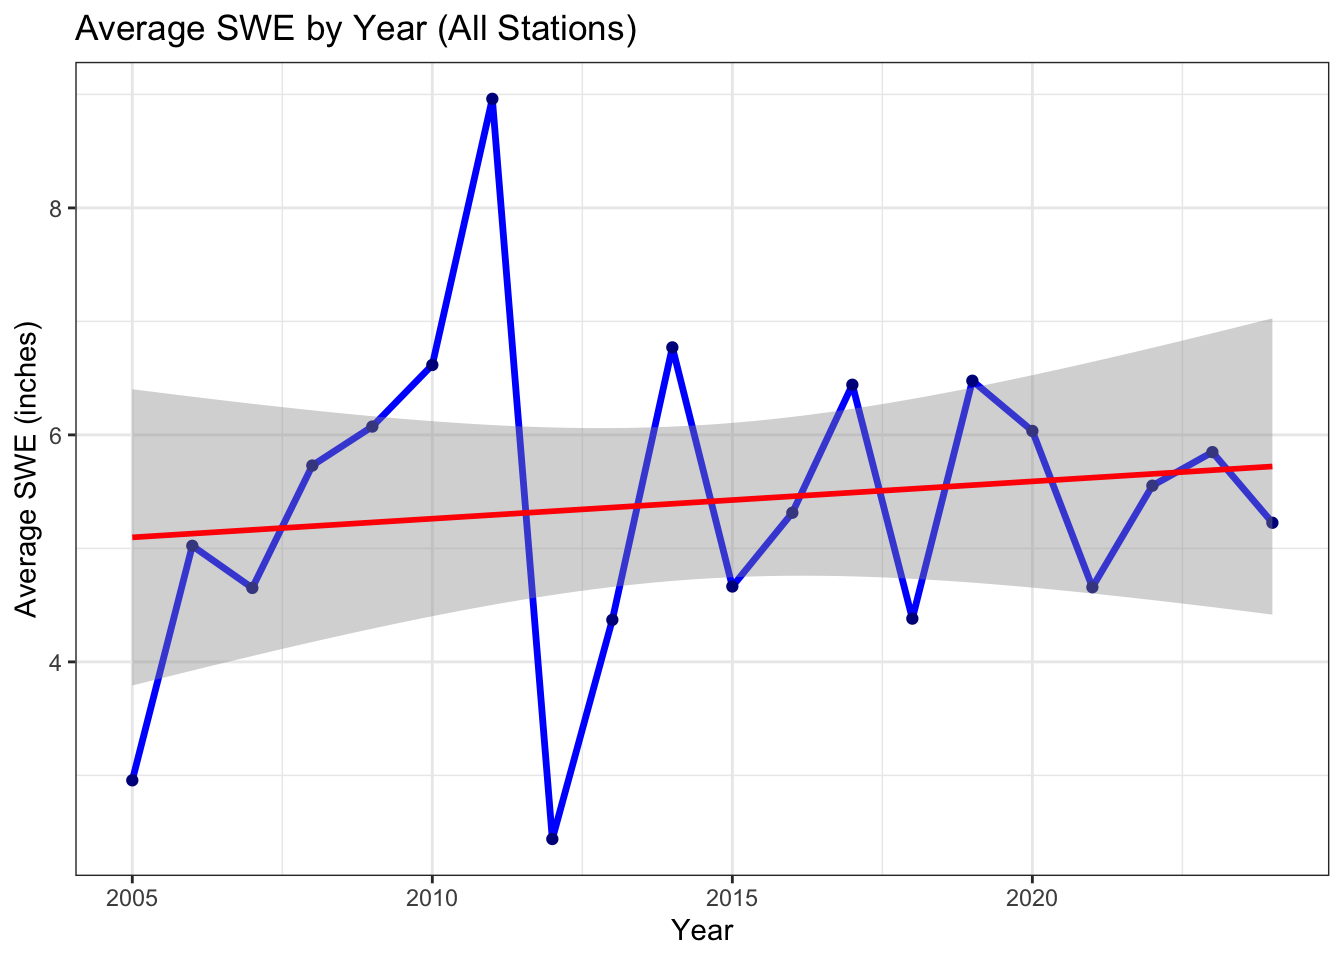

In [ ]:
library(tidyverse)

Fig. 1A

`geom_smooth()` using formula = 'y ~ x'

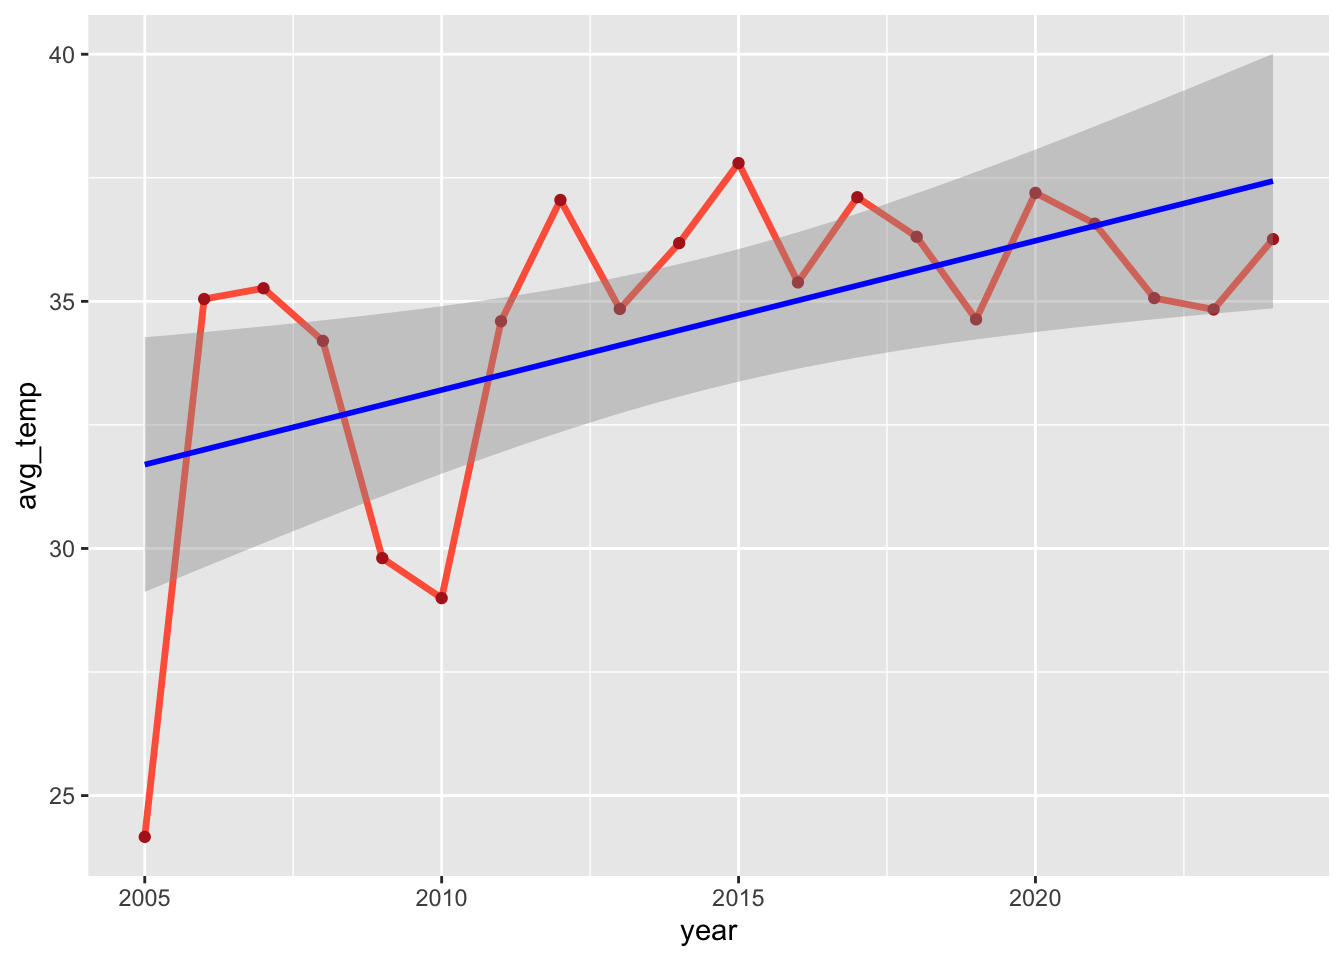

NULL

In [ ]:
temp_data <- df %>%
  select(year, contains("air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

annual_temp <- temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(avg_temp = mean(temp, na.rm = TRUE))

ggplot(annual_temp, aes(x = year, y = avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")

Fig. 1B

### Site-by-Site Analysis

#### Bear Lake (322)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

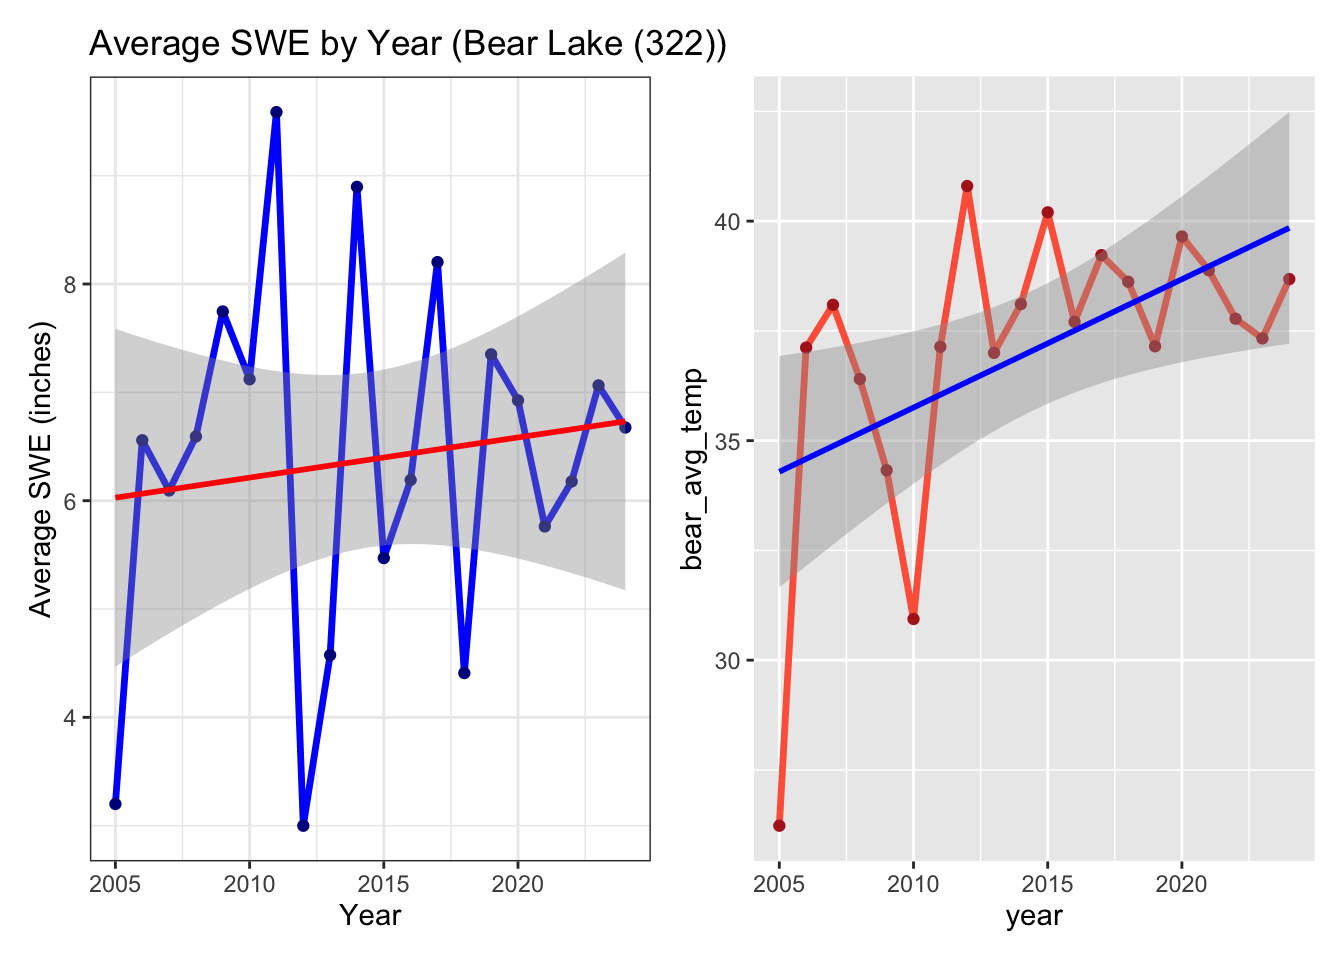

In [ ]:
library(patchwork)
bear_swe_data <- df %>%
  select(year, contains("322_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

bear_swe_data <- bear_swe_data %>%
  mutate(swe = as.numeric(swe))

bear_annual_swe <- bear_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(bear_avg_swe = mean(swe, na.rm = TRUE)) 

bear_swe_plot <- ggplot(bear_annual_swe, aes(x = year, y = bear_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Bear Lake (322))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

bear_temp_data <- df %>%
  select(year, contains("322_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

bear_annual_temp <- bear_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(bear_avg_temp = mean(temp, na.rm = TRUE))

bear_temp_plot <- ggplot(bear_annual_temp, aes(x = year, y = bear_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Bear Lake (322))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

Fig. 2A

#### Copeland Lake (412)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

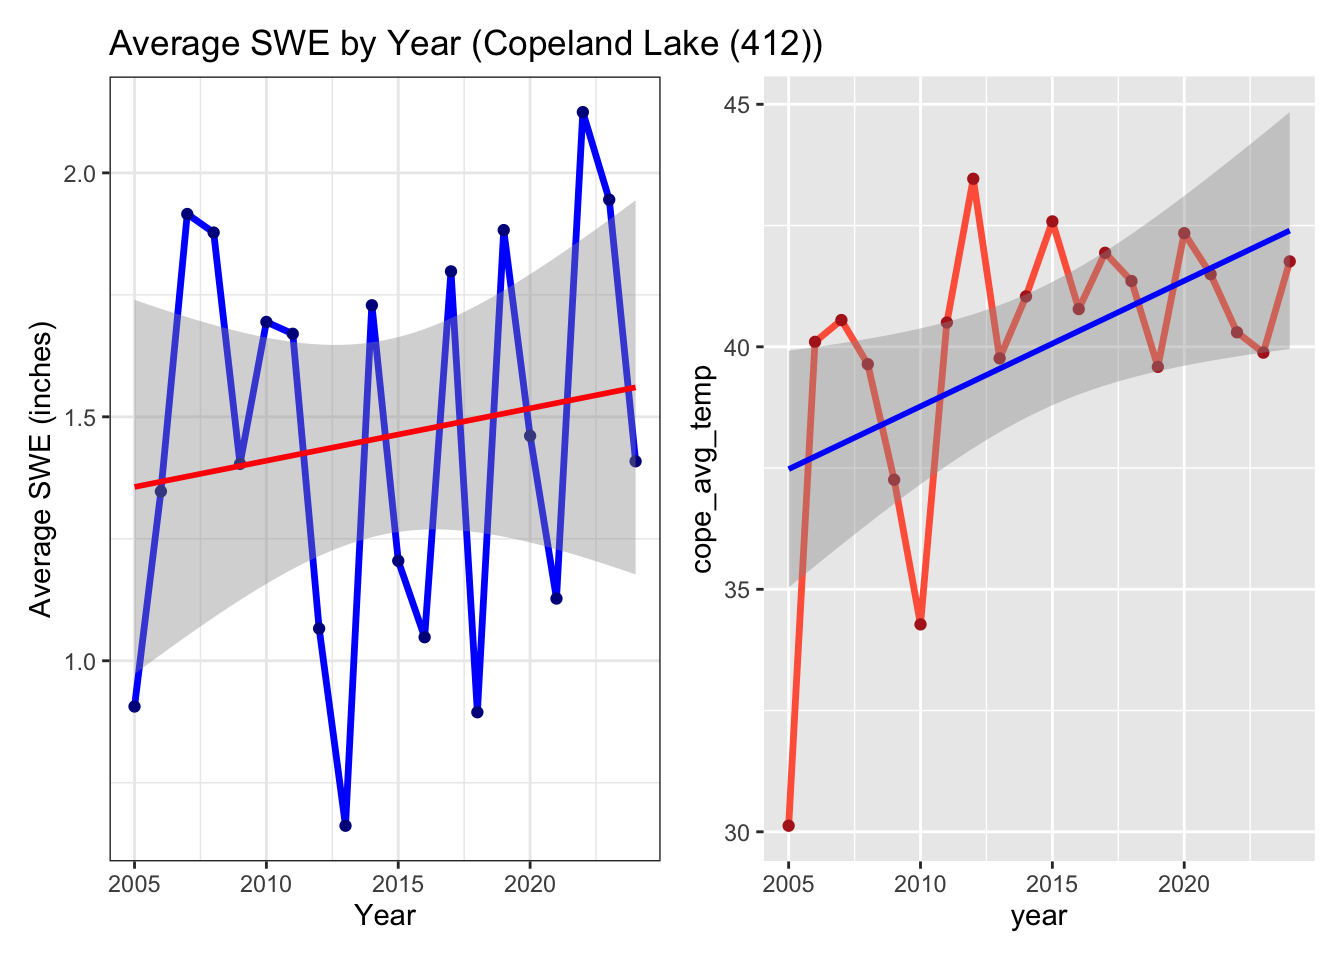

In [ ]:
cope_swe_data <- df %>%
  select(year, contains("412_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

cope_swe_data <- cope_swe_data %>%
  mutate(swe = as.numeric(swe))

cope_annual_swe <- cope_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(cope_avg_swe = mean(swe, na.rm = TRUE)) 

cope_swe_plot <- ggplot(cope_annual_swe, aes(x = year, y = cope_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Copeland Lake (412))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

cope_temp_data <- df %>%
  select(year, contains("412_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

cope_annual_temp <- cope_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(cope_avg_temp = mean(temp, na.rm = TRUE))

cope_temp_plot <- ggplot(cope_annual_temp, aes(x = year, y = cope_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Copeland Lake (412))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

Fig. 2B

#### Lake Irene (565)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

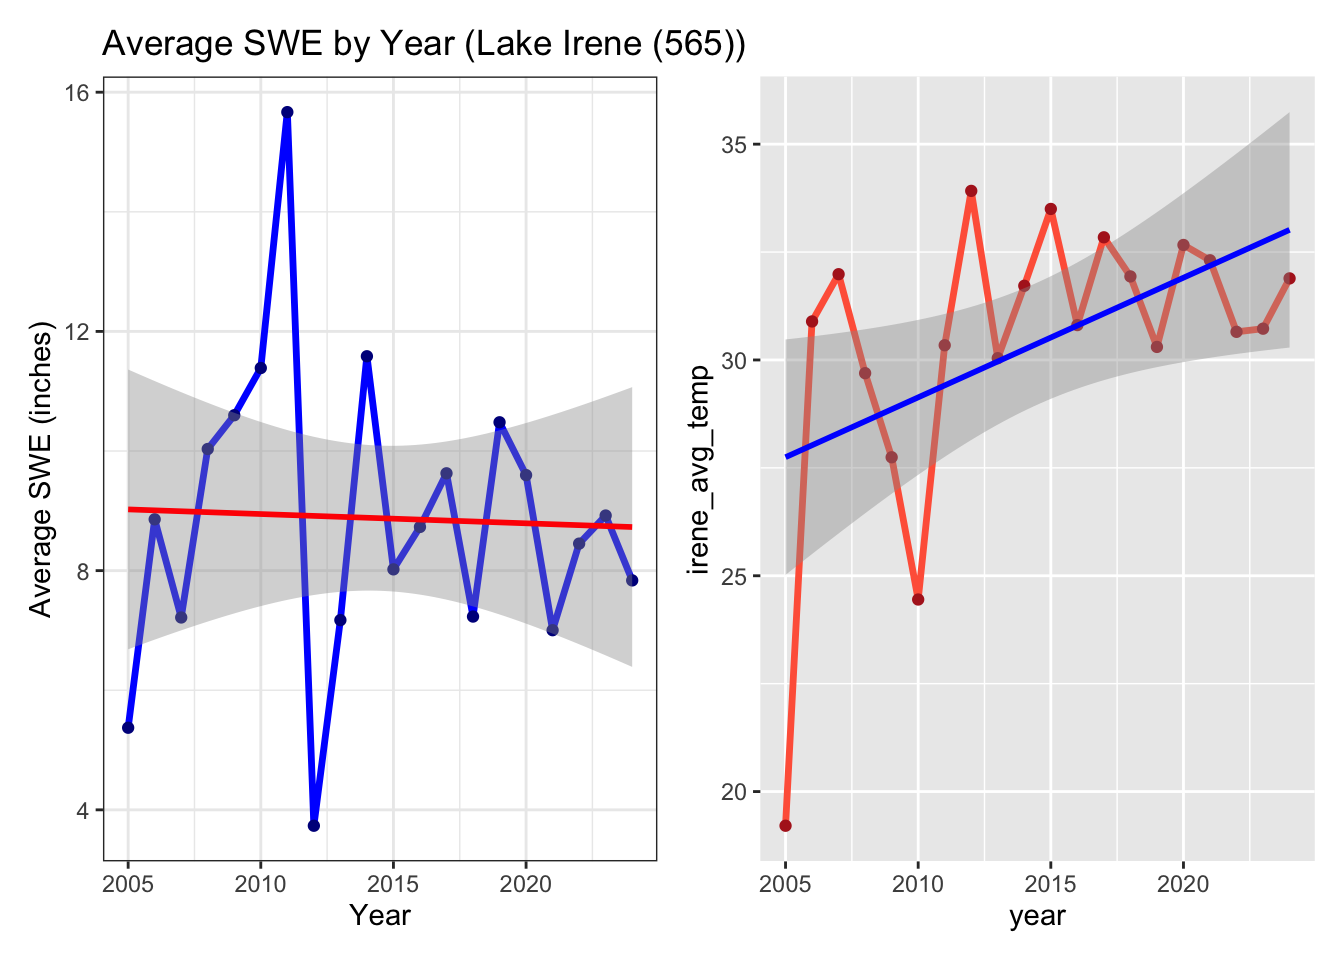

In [ ]:
irene_swe_data <- df %>%
  select(year, contains("565_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

irene_swe_data <- irene_swe_data %>%
  mutate(swe = as.numeric(swe))

irene_annual_swe <- irene_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(irene_avg_swe = mean(swe, na.rm = TRUE)) 

irene_swe_plot <- ggplot(irene_annual_swe, aes(x = year, y = irene_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Lake Irene (565))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

irene_temp_data <- df %>%
  select(year, contains("565_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

irene_annual_temp <- irene_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(irene_avg_temp = mean(temp, na.rm = TRUE))

irene_temp_plot <- ggplot(irene_annual_temp, aes(x = year, y = irene_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Lake Irene (565))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

Fig. 2C

#### Phantom Valley (688)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

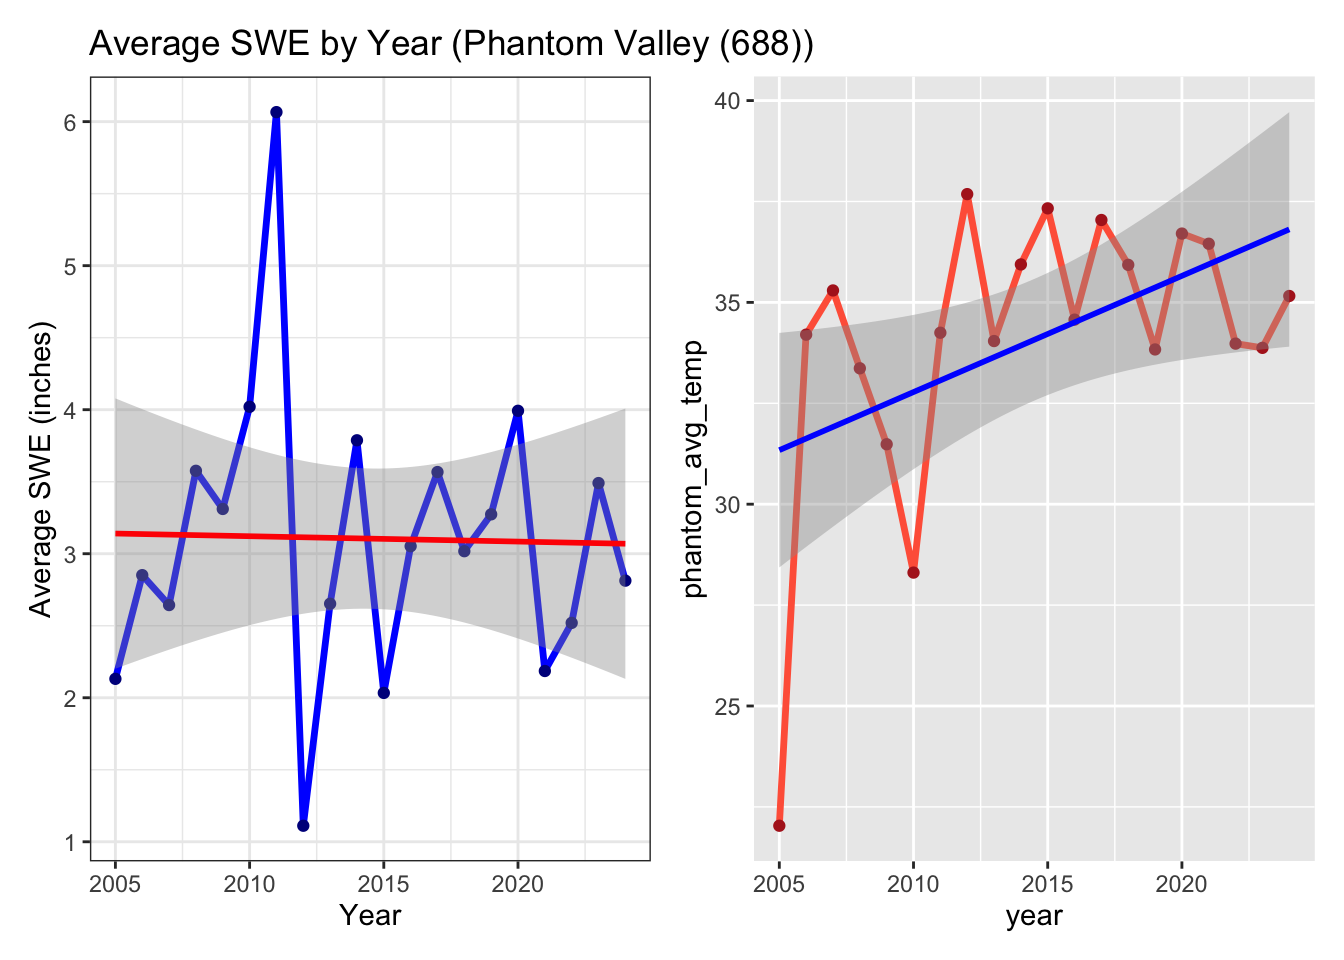

In [ ]:
phantom_swe_data <- df %>%
  select(year, contains("688_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

phantom_swe_data <- phantom_swe_data %>%
  mutate(swe = as.numeric(swe))

phantom_annual_swe <- phantom_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(phantom_avg_swe = mean(swe, na.rm = TRUE)) 

phantom_swe_plot <- ggplot(phantom_annual_swe, aes(x = year, y = phantom_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Phantom Valley (688))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

phantom_temp_data <- df %>%
  select(year, contains("688_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

phantom_annual_temp <- phantom_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(phantom_avg_temp = mean(temp, na.rm = TRUE))

phantom_temp_plot <- ggplot(phantom_annual_temp, aes(x = year, y = phantom_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Phantom Valley (688))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

Fig. 2D

#### Wild Basin (1042)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

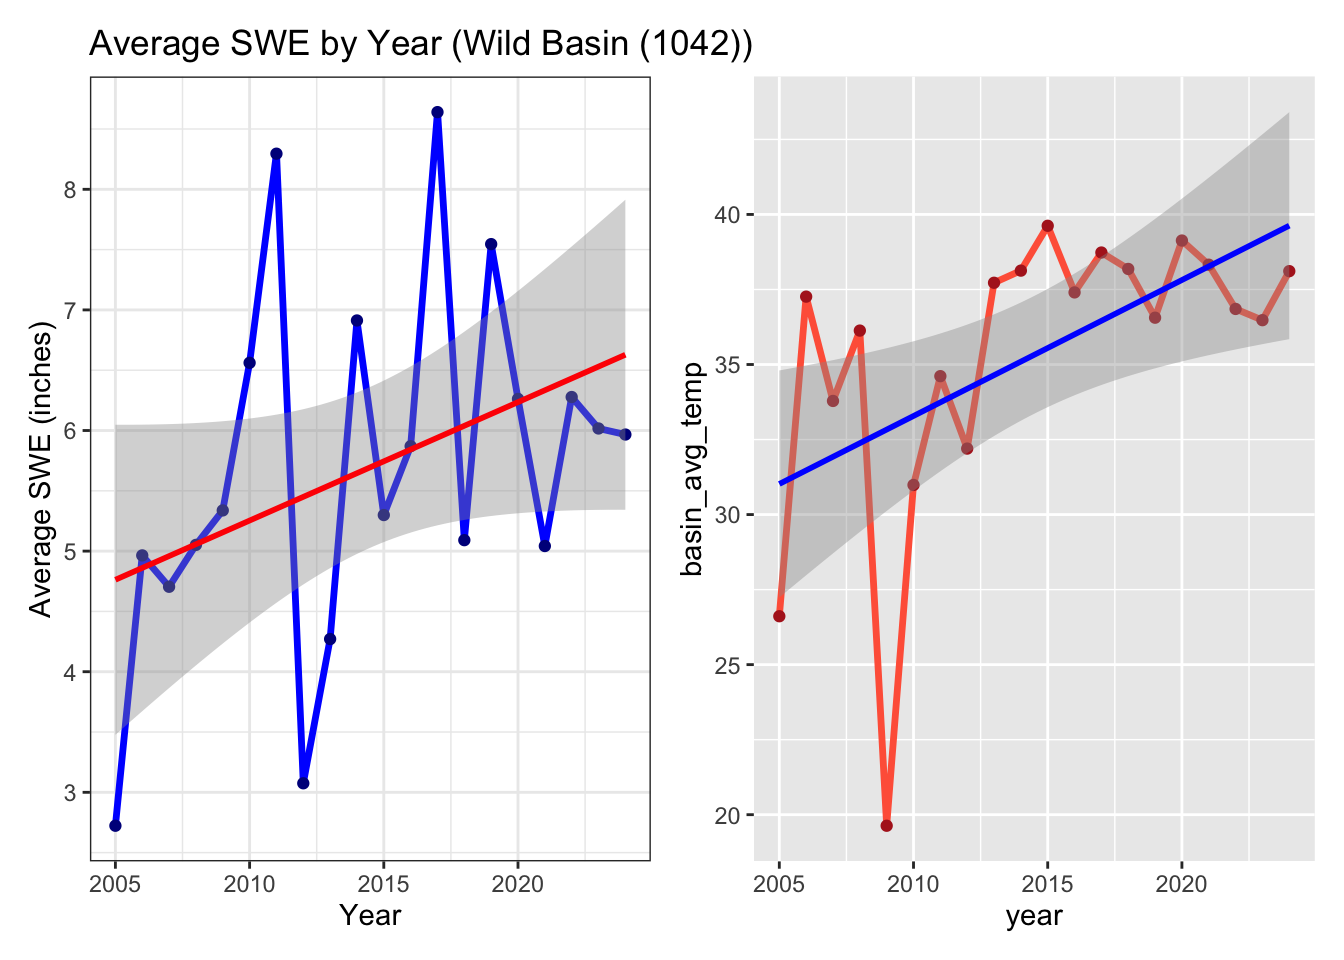

In [ ]:
basin_swe_data <- df %>%
  select(year, contains("1042_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

basin_swe_data <- basin_swe_data %>%
  mutate(swe = as.numeric(swe))

basin_annual_swe <- basin_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(basin_avg_swe = mean(swe, na.rm = TRUE)) 

basin_swe_plot <- ggplot(basin_annual_swe, aes(x = year, y = basin_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Wild Basin (1042))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

basin_temp_data <- df %>%
  select(year, contains("1042_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

basin_annual_temp <- basin_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(basin_avg_temp = mean(temp, na.rm = TRUE))

basin_temp_plot <- ggplot(basin_annual_temp, aes(x = year, y = basin_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Wild Basin (1042))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

Fig. 2E

#### Willow Park (870)

NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

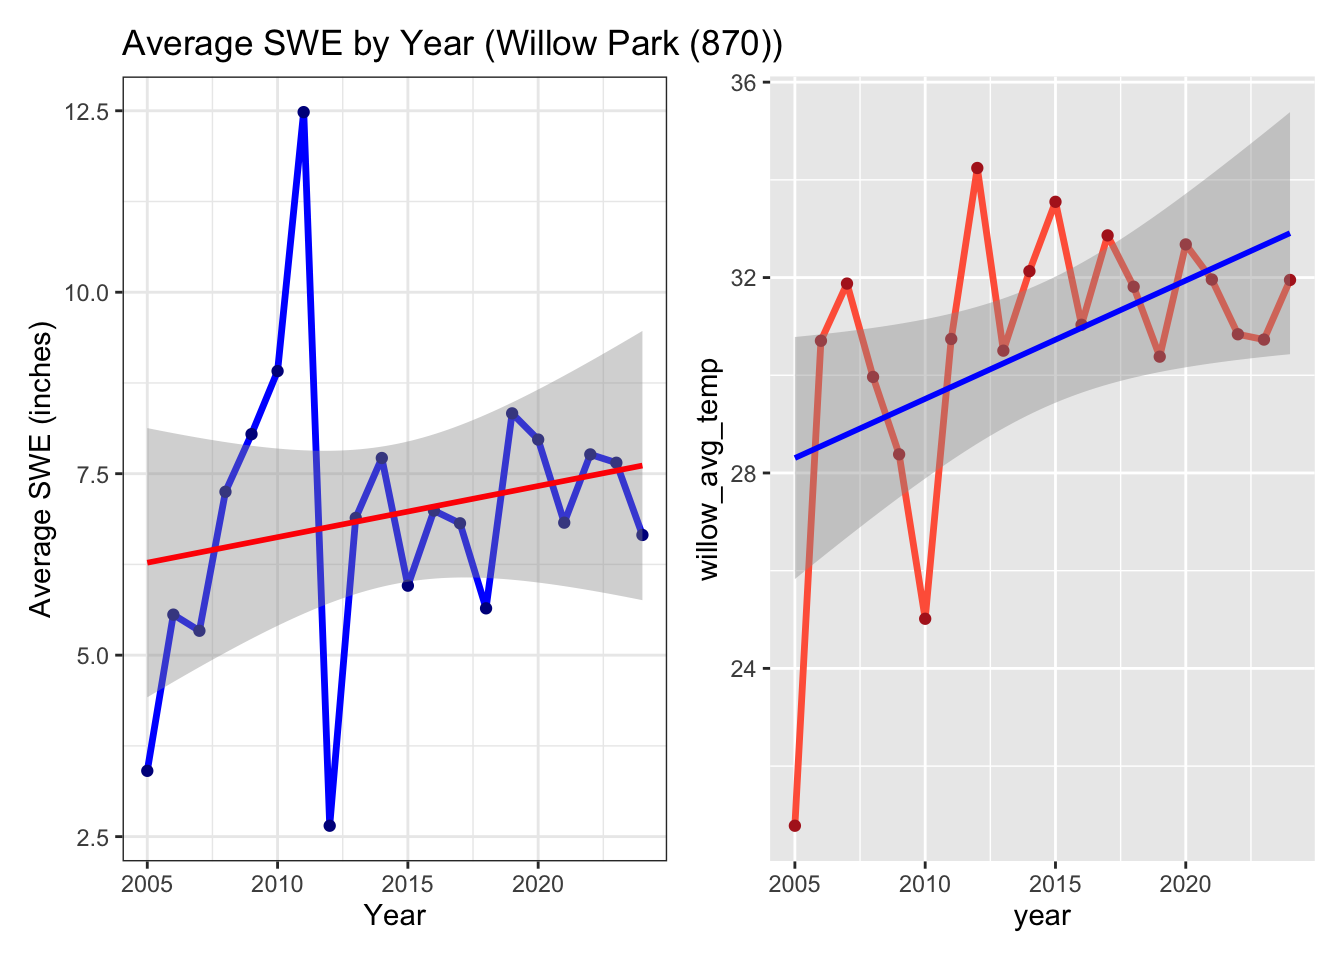

In [ ]:
willow_swe_data <- df %>%
  select(year, contains("870_snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  )

willow_swe_data <- willow_swe_data %>%
  mutate(swe = as.numeric(swe))

willow_annual_swe <- willow_swe_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(willow_avg_swe = mean(swe, na.rm = TRUE)) 

willow_swe_plot <- ggplot(willow_annual_swe, aes(x = year, y = willow_avg_swe)) +
  geom_line(color = "blue", linewidth = 1.2) +
  geom_point(color = "darkblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Average SWE by Year (Willow Park (870))",
       x = "Year", y = "Average SWE (inches)") +
  theme_bw()

willow_temp_data <- df %>%
  select(year, contains("870_air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(temp = as.numeric(temp))

willow_annual_temp <- willow_temp_data %>%
  filter(year < 2025) %>%
  group_by(year) %>%
  summarise(willow_avg_temp = mean(temp, na.rm = TRUE))

willow_temp_plot <- ggplot(willow_annual_temp, aes(x = year, y = willow_avg_temp)) +
  geom_line(color = "tomato", linewidth = 1.2) +
  geom_point(color = "firebrick") +
  geom_smooth(method = "lm", se = TRUE, color = "blue")
  labs(title = "Average Air Temperature by Year (Willow Park (870))",
       x = "Year", y = "Avg Temp (°F)") +
  theme_bw()

Fig. 2F

### Statistical Analysis

Conducting One-Way ANOVA testing for both the site-based differences in SWE and MAT revealed statistically significant differences, confirming our visual analysis of both variables across each of the six sites. In our ANOVA testing for SWE, there was strong statistical significance that there was site-based variability in SWE (F-Statistic = 1022, P = \<2e-16, Fig. 3A). When conducting ANOVA testing for MAT, there was also strong statistical significance for site-based temperature variability (F-Statistic = 333.5, P = \<2e-16, Fig. 3B). Our Two-Way ANOVA testing analyzed the effect of MAT and site on SWE, with our results demonstrating that there are statistically significant impacts of MAT on SWE, though not all of the sites exhibited the same MAT/SWE relationship (Fig. 3C).

#### SWE One-Way ANOVA

In [ ]:
library(dplyr)
library(tidyr)
library(stringr)

site_swe_data <- df %>%
  select(year, contains("snow_water_equivalent")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "swe"
  ) %>%
  mutate(
    site_code = str_extract(station, "_\\d+_") %>%
                str_replace_all("_", "")
  ) %>%
  arrange(as.numeric(site_code))

swe_anova <- aov(swe ~ site_code, data = site_swe_data)
summary(swe_anova)

               Df  Sum Sq Mean Sq F value Pr(>F)    
site_code       5  239830   47966    1022 <2e-16 ***
Residuals   37776 1773767      47                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Fig. 3A

#### TEMP One-Way ANOVA

In [ ]:
site_temp_data <- df %>%
  select(year, contains("air_temperature_average")) %>%
  pivot_longer(
    cols = -year,
    names_to = "station",
    values_to = "temp"
  ) %>%
  mutate(
    site_code = str_extract(station, "_\\d+_") %>%
                str_replace_all("_", "")
  ) %>%
  arrange(as.numeric(site_code))

temp_anova <- aov(temp ~ site_code, data = site_temp_data)
summary(temp_anova)

               Df  Sum Sq Mean Sq F value Pr(>F)    
site_code       5  435442   87088   333.5 <2e-16 ***
Residuals   37776 9864814     261                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Fig. 3B

#### Two-Way ANOVA

In [ ]:
df_merged <- merge(site_temp_data, site_swe_data, by = c("site_code", "year"))

aov_swe_continuous <- aov(swe ~ temp * site_code, data = df_merged)
summary(aov_swe_continuous)

                     Df    Sum Sq  Mean Sq  F value Pr(>F)    
temp                  1   2393314  2393314  50201.9 <2e-16 ***
site_code             5  77745211 15549042 326154.9 <2e-16 ***
temp:site_code        5     39165     7833    164.3 <2e-16 ***
Residuals      12482022 595065286       48                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Fig. 3C

### Time Series Analysis

Through our use of Time Series Analysis, we were able to observe the raw SWE time series, trends, season year, and remainder for each of the sites. In the raw SWE time series, there are visual seasonal spikes occurring with seasons of snow accumulation. The long term trends section demonstrated that there were slight declines for some sites, such as Lake Irene, which exhibited a more variable trend (Fig. 4). The season year visualization indicates that there are highly consistent annual seasonal patterns of snowpack across the six sites, which is consistent with current literature surrounding snowfall patterns. Within the randomness section, it can be observed that there is a decent amount of unexplained variance in SWE that cannot be explained by temperature.

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr


Attaching package: 'tsibble'

The following object is masked from 'package:lubridate':

    interval

The following objects are masked from 'package:base':

    intersect, setdiff, union

Loading required package: fabletools

# A tibble: 0 × 2
# ℹ 2 variables: site <chr>, n <int>

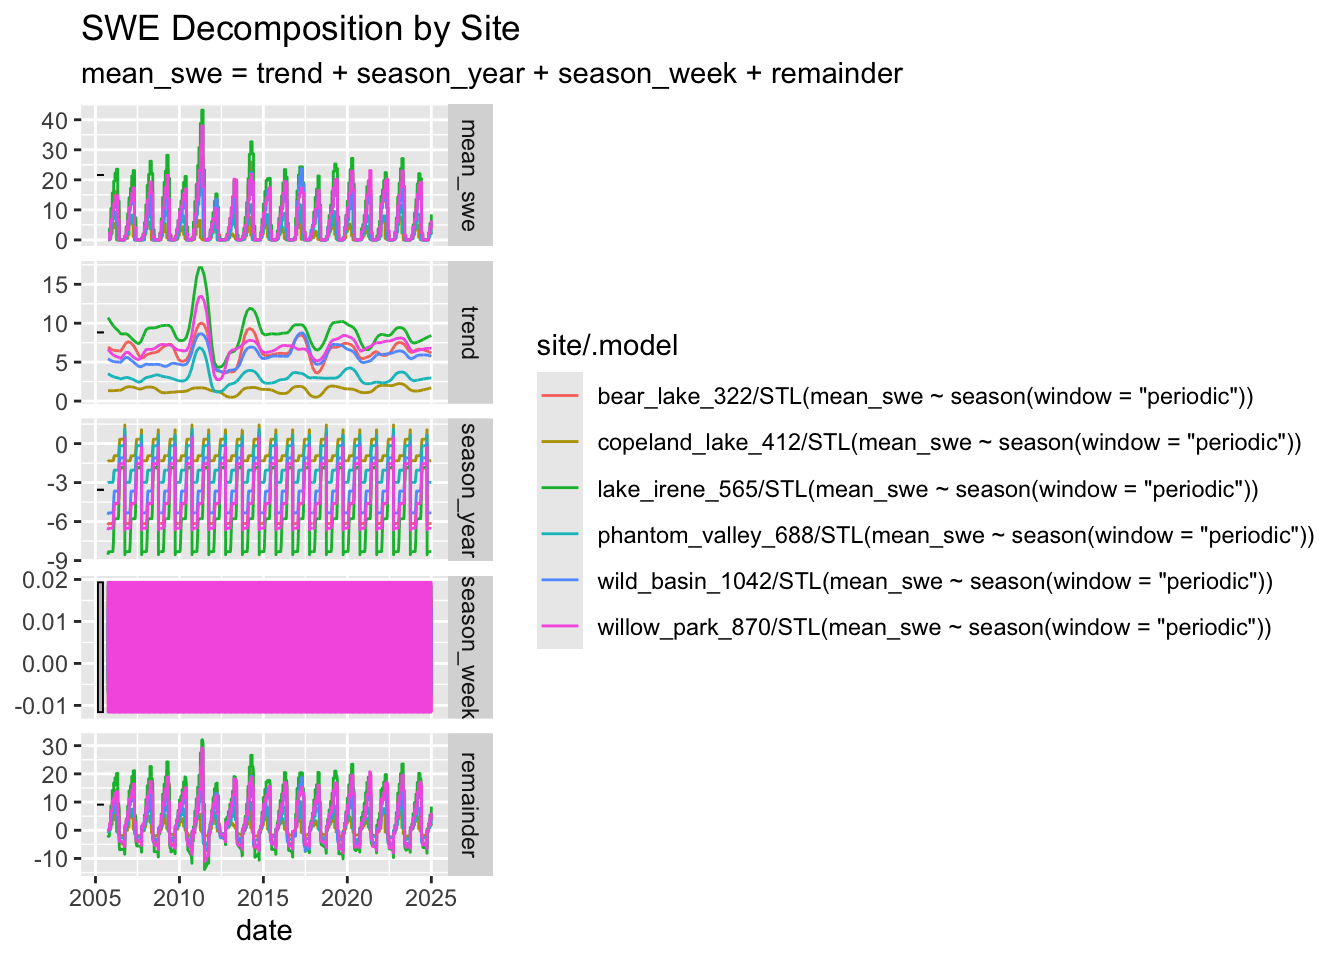

In [ ]:
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(ggpubr)
library(tidyverse)

rmnp_clean <- rmnp_clean %>%
  select(date, contains(c("322_snow_water_equivalent", "412_snow_water_equivalent", "565_snow_water_equivalent","688_snow_water_equivalent", "1042_snow_water_equivalent", "870_snow_water_equivalent"))
  ) %>%
  rename(Date_col = date) %>%
  mutate(Date_col = mdy(Date_col)) %>%
  arrange(Date_col) %>%
  drop_na()

library(tsibble)

Fig. 4

# Discussion

In our initial data visualization, we graphed the annual aggregate snow water equivalent by year for and the mean aggregate temperature by year for the sites in Rocky Mountain National Park. We included lines of best fit for both of the graphical representations of these variables to get a sense for general trends we might be looking at. In the average aggregate snow water equivalent by year data, there appears to be a slight upward trend throughout the 20-year period of analysis (Fig. 1A). Similarly, in the data for the mean aggregate temperature by year there appears to be an increasing trend, though much sharper than the snow water equivalent graph (Fig. 1B). Following these initial aggregate analyses, we separated each of the sites and conducted the same exploratory analysis for all six over the 20-year period to observe individual variations within each site. Contrary to our hypothesis, four out of the six sites exhibited increased snow water equivalent levels with increasing temperatures over the 20-year period of study (Fig. 2A, 2B, 2E, 2F). This may indicate that increased temperatures may reduce snowfall, but increase the overall density of water content within the snow itself leading to higher recorded snow water equivalents. Through our use of ANOVA analysis we were able to conduct one-way analyses with both individual variables for each study site, as well as observing the relationship between the two variables. Our analysis of snow water content revealed that site number was a strong indicator of the variable, suggesting that site-based differences such as altitude might affect snowpack in relation to temperature (Fig. 3A). Similarly, we found that temperature was similarly impacted by site number, pointing to a difference of variables based on site conditions (Fig. 3B) . In our two-way analysis, we found that around 48% of the variance in snow water equivalence could be explained by temperature, which suggests that additional variables account for the remaining 50% of variance (Fig. 3C). This could be a jumping point for additional study, prompting the exploration of other variables within the data set. We used a Seasonal-Trend Decomposition using LOESS (STL) for monthly average snow water equivalent (SWE) data across the six sites. The results of the decomposition were analyzed by components to better understand how SWE changes year over year. The mean_swe graph represents the original time series data, indicating that each site shows strong seasonal SWE peaks between March-April, with Lake Irene consistently having the highest SWE and Copeland Lake and Willow Park rank lowest (Fig. 4). The trend component graph smooths out seasonal variance to show trends year to year, with site differences emerging. Some sites, like Lake Irene and Phantom Valley show declines in SWE post ~2011 specifically (Fig. 4). Other sites, like Copeland Lake, reflect a relatively stable if not slightly increasing SWE trend. These differences between trends suggest site-specific variability in SWE in response to changing weather and climate patterns. More data analysis is needed at the site level to assess how other variables such as elevation or latitude may contribute to differences in trends.  
The season_year component captures annual patterns and indicates that SWE is highly seasonal following a similar pattern each year, with the greatest snowpack in March-April, then decreasing during the summer months and accumulating through winter (Fig. 4). The season_week indicates there is no additional weekly pattern to seasonality, but this may not accurately reflect weekly variation as the time series was built on monthly average values to avoid noise in the data. The remainder component represents residuals and displays no major anomalies, suggesting that the STL decomposition captures the structure of the time series well. There are minor outliers, with a spike in 2011 accompanied by variance in the pattern until 2015. These outliers could reflect year to year weather variations and may be influenced by extreme weather events or El Niño/La Niña years. Though our study indicates that more research into the effects of climate change on alpine snowpack levels is needed to further explore the relationship between temperature changes and snow water equivalents, it may open new conversations around unexpected results of climate change. Our study is limited by the timespan of our data, which only shows a snapshot of recorded trends relating to snowpack in Rocky Mountain National Park, though further analysis could build upon our study with an expanded time frame. Additionally, our study was limited by the time we had to complete it and the extent of our data analysis skills. The relationship between snow water equivalents and other variables in the data could be further explored, highlighting the extent to which multivariate analysis could explain some of the additional variance.